In [19]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab as pl
from math import log10
from math import ceil
from collections import Counter

file = open('/Users/sajain/Documents/DataMining/arnetminer/AP_train.txt')

# Maintain the count of unique authors in the dataset
author_set = set()

# Maintain the count of unique venue in the dataset
publication_venue_set = set()

# Maintain the count of Publications/Indexes in the dataset
index_set = set()

# Dictionary maintains author to number of pubications
author_to_publication = {}

# Dictionary maintains year to of pubications
year_to_publication = {}

# Retains the list of all refrences to calculate citation in the
citations_all = []

# Retains the count of publications for each venue
venue_publicationcount = {}

# Retains the list of publications for each venue
venue_publication = {}

# Retains the count of refrences for each publication
index_refrencecount = {}

# Retains the count of citation for each publication
index_citationcount = {}

# Retains the count of refrences for each publication
index_title = {}

# Intermediate variables, that keep values for fields for every record
author_keep = []
index_keep = ''
venue_keep = ''
title_keep = ''
year_keep = ''
refrence_count = 0

# File parsing code, that intermediate variables that I maintain for each record
# Feed the parsed values to relvant dictionaries and reset the variables
for line in file:
    if line.startswith('#index'):
        index = line.split(' ')[1]
        index_set.add(index.strip())
        index_keep = index.strip()

    elif line.startswith('#*'):
        title = line[3:]
        title_keep = title.strip()

    elif line.startswith('#@'):
        authors = line[3:].split(';')
        for i, s in enumerate(authors):
            val = s.strip()
            if len(val) > 0:
                authors[i] = val;
                author_set.add(val)
        author_keep += authors

    elif line.startswith('#t'):
        year_keep = line[3:].strip()

    elif line.startswith('#c'):
        publication_venue = line[3:]
        venue_keep = publication_venue.strip()
        publication_venue_set.add(publication_venue.strip())

    elif line.startswith('#%'):
        citation = line[3:].strip()
        citations_all.append(citation)
        refrence_count += 1

    elif line == '\n':
            for auth in author_keep:
                auth = auth.strip()
                if auth == '':
                    continue
                if auth in author_to_publication:
                    author_to_publication[auth].append(index_keep)
                else:
                    author_to_publication[auth] = [index_keep]

            if venue_keep != '':
                if venue_keep in venue_publicationcount:
                    venue_publicationcount[venue_keep] += 1
                else:
                    venue_publicationcount[venue_keep] = 1

            if index_keep in index_refrencecount:
                index_refrencecount[index_keep] += refrence_count
            else:
                index_refrencecount[index_keep] = refrence_count


            if venue_keep in venue_publication and index_keep != '':
                venue_publication[venue_keep].append(index_keep)
            else:
                venue_publication[venue_keep] = [index_keep]

            if year_keep in year_to_publication and index_keep != '':
                year_to_publication[year_keep].append(index_keep)
            else:
                year_to_publication[year_keep] = [index_keep]

            index_title[index_keep] = title_keep

            title_keep = ''
            refrence_count = 0
            venue_keep = ''
            index_keep = ''
            author_keep[:] = []

file.close()
print('Question 1st')
print('# 1:a')
print('Unique authors in dataset')
print(author_set.__len__())
print('Unique Publication Venues')
print(publication_venue_set.__len__())
print('Number of Unique indexes (Publications)')
print(index_set.__len__())
print('')
print("# 1:b These numbers are not likely to be accurate because a same venue can be addressed in more than one ways. These subtle issues might effect the accuracy. Same applies to the Authors, i.e authors can be referred by more than one names which can affect the accuracy as well. Publication is likely to be correct since they are identified by a unique id")

print("# 1:c Same is the problem with authors, i.e authors can be referred by one more names with subtle distictions and might be counted as two different authors instead of one. These language semantics cause results to be erroneous")


Question 1st
# 1:a
Unique authors in dataset
1478733
Unique Publication Venues
255686
Number of Unique indexes (Publications)
1976815

# 1:b These numbers are not likely to be accurate because a same venue can be addressed in more than one ways. These subtle issues might effect the accuracy. Same applies to the Authors, i.e authors can be referred by more than one names which can affect the accuracy as well. Publication is likely to be correct since they are identified by a unique id
# 1:c Same is the problem with authors, i.e authors can be referred by one more names with subtle distictions and might be counted as two different authors instead of one. These language semantics cause results to be erroneous


Question 2
#2:a


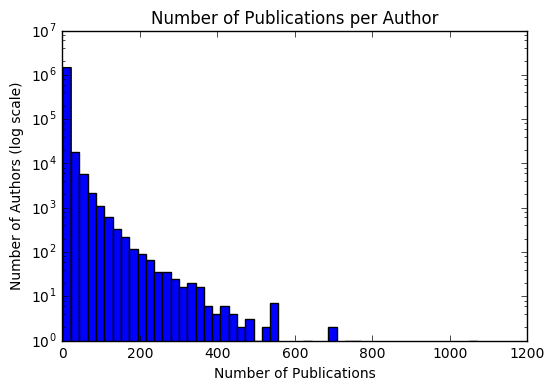

#2:b
Mean of Number of Publications per author: 3.29178560295
Standard Deviation of Number of Publications per author: 8.87188969104
Quartiles [ Q1, Q2, Q3, Q4] for Number of Publications per author are: [ 1.  1.  1.  2.]

 Q. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.
 Ans. If mean and median are not equal that means data is skewed since 3rd Quartile is equal to 1st Quartile it suggests that 75% of the data has same value. Also difference between min and max value of the data is huge. Here standard deviation is high, that suggests data points are away from the mean, that means data points is more spread out.
 
#2.c


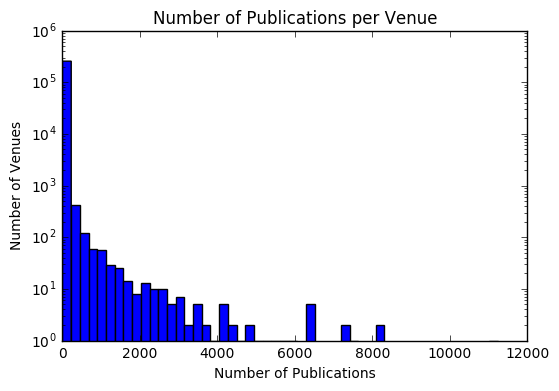

Mean of Number of Publications per venue: 7.73096583687
Standard Deviation of Number of Publications per venue: 83.3809075408
Quartiles [Q1, Q2 or Median, Q3, Q4] for Number of Publications per venue are: [ 1.  1.  1.  1.]
Max number of publication for venue: IEEE Transactions on Information Theory
Max number of publication for above venue: 11227


In [23]:
print('Question 2')
print('#2:a')

# Funtion to plot a histogram
def histogram_graph(x, number_bins, x_label, y_label, title, log_scale=False):
    n, bins, patches = plt.hist(x, number_bins, log=log_scale)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

auth_pub_count = list(map(lambda l: len(l[1]), author_to_publication.items()))
histogram_graph(auth_pub_count, 50, 'Number of Publications', 'Number of Authors (log scale)',
                'Number of Publications per Author', log_scale=True)

pubcount_authcount = {};
for aut in author_to_publication.keys():
    num_of_pubs = len(author_to_publication[aut])
    if num_of_pubs in pubcount_authcount.keys():
        pubcount_authcount[num_of_pubs] += 1
    else:
        pubcount_authcount[num_of_pubs] = 1

d = dict(map(lambda l: (l[0], log10(l[1])), pubcount_authcount.items()))

print('#2:b')
num_of_pubs_per_auth = list(map(lambda l: len(l), author_to_publication.values()));

print('Mean of Number of Publications per author: '+str(np.mean(num_of_pubs_per_auth)))
print('Standard Deviation of Number of Publications per author: '+str(np.std(num_of_pubs_per_auth)))
print('Quartiles [ Q1, Q2, Q3, Q4] for Number of Publications per author are: ',end=""),
print(np.percentile(sorted(num_of_pubs_per_auth),np.arange(0,100,25)))
print('')
print (' Q. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.')
print (' Ans. If mean and median are not equal that means data is skewed since 3rd Quartile is equal to 1st Quartile it suggests that 75% of the data has same value. Also difference between min and max value of the data is huge. Here standard deviation is high, that suggests data points are away from the mean, that means data points is more spread out.')

print(' ')
print('#2.c')

d2 = dict(map(lambda l: (l[0], l[1]), venue_publicationcount.items()))
venue_pub_list = list(map(lambda l: l[1], venue_publicationcount.items()))
histogram_graph(venue_pub_list, 50, 'Number of Publications', 'Number of Venues',
                'Number of Publications per Venue', log_scale=True)


print('Mean of Number of Publications per venue: '+str(np.mean(venue_pub_list)))
print('Standard Deviation of Number of Publications per venue: '+str(np.std(venue_pub_list)))
print('Quartiles [Q1, Q2 or Median, Q3, Q4] for Number of Publications per venue are: ',end=""),
print(np.percentile(sorted(venue_pub_list),np.arange(0,100,25)))
print('Max number of publication for venue: ',end=""),
print(str(max(venue_publicationcount, key=venue_publicationcount.get)))
print('Max number of publication for above venue: ',end=""),
print(max(venue_publicationcount.values()))



Question 3
# 3.a


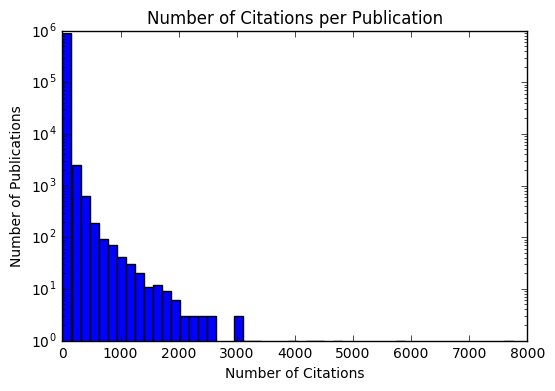

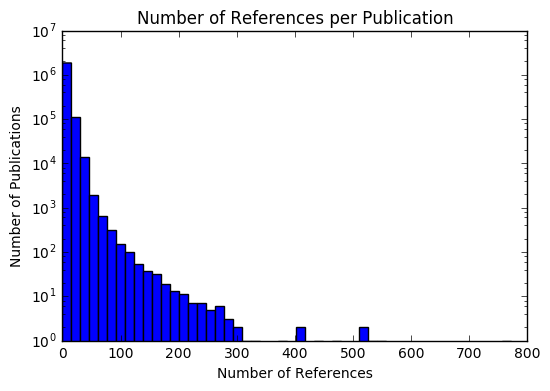

Publications with largest citations: Computers and Intractability: A Guide to the Theory of NP-Completeness
Publications with largest refrences: Cited References
# 3.b


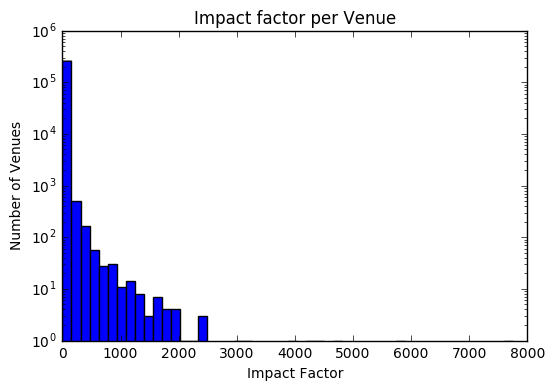

# 3.c
Highest Impact factor for a venue: Computers and Intractability: A Guide to the Theory of NP-Completeness
Impact factor is: 7753.0
Q. Do you believe in this impact factor 
A. It is likely to be inaccurate since a same venue can be addressed with two or more names and hence it
may give us erroneous results when put in a dictionary
 
# 3.d


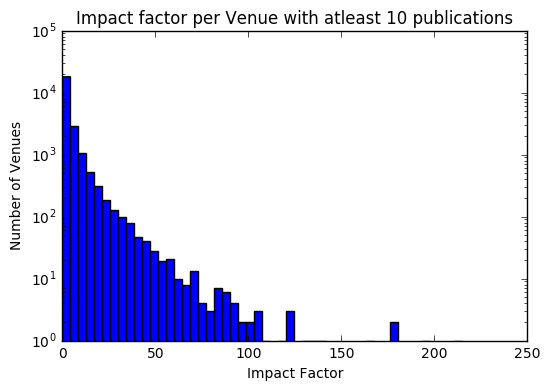

Q. How does the histogram change 
A. Since we only consider the venues with atleast 10 publications, hence range of the impact factor
decreases and the histogram (Impact factor per Venue with atleast 10 publicaiton)
graph shows a subset of the histogram (Impact factor per Venue) Hence x range decreases till 200 approx
 
Citation counts of venue with highest impact factor
[167, 115, 48, 11, 138, 50, 10, 11, 112, 103, 27, 2140, 1609, 87, 22, 67, 19, 28, 22, 21, 42, 46, 46]
 
Mean of Impact Factor with atleast 10 publications 214.826086957
Quartiles [Q1, Q2 or Median, Q3, Q4] for Impact factor are with atleast 10 publications [  10.    22.    46.   107.5]
 
Q. How does the impact factor mean number of citations compare to the median number of citations? 
 The range of data i.e max, min and median values suggest that data is skewed. That is median(22) is far from mean(214.82)
 
# 3.e


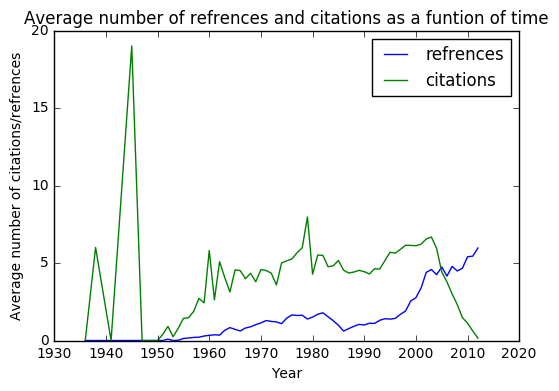

 Q. Explain difference between the trends ? 
 The average refrences have an overall increase over the years with an exception between 1980 to 1990. While trend in citaion is not uniform it has a huge increase (reaches to the highest value) and decreases to 0 between 1940 - 1950 and then it doesnt have a uniform pattern. Although average number of citations decrease from 2000 to 2010 where average refrences have a small increase in average.


In [21]:
print('Question 3')

# Maintains citation count for each index
index_citationcount = dict(Counter(citations_all))
# Maintains impact factor each venue 
impact_factor = {}
# Maintains average refrences for each year
avg_refrences_year = {}
# Maintains average citaion for each year
avg_citations_year = {}
# Maintains impact factor for venues for atleast 10 publications
impact_factor_atleast10 = {}

count = 0;

print('# 3.a')
for x in index_refrencecount.keys():
    if x not in index_citationcount:
        count += 1

cit_list = list(map(lambda l: l[1], index_citationcount.items()))
ref_list = list(map(lambda l: l[1], index_refrencecount.items()))

histogram_graph(cit_list, 50, 'Number of Citations', 'Number of Publications',
                'Number of Citations per Publication', log_scale=True)

histogram_graph(ref_list, 50, 'Number of References', 'Number of Publications',
                'Number of References per Publication', log_scale=True)

print('Publications with largest citations: '+str(index_title[max(index_citationcount, key=index_citationcount.get)]))
print('Publications with largest refrences: '+str(index_title[max(index_refrencecount, key=index_refrencecount.get)]))

print('# 3.b')

for key,value in venue_publication.items():
    counter = 0
    for pub in value:
        if pub in index_citationcount:
            counter += index_citationcount[pub]
    impact_factor[key] = counter / len(value)

impact_list = list(map(lambda l: l[1], impact_factor.items()))

histogram_graph(impact_list, 50, 'Impact Factor', 'Number of Venues',
                'Impact factor per Venue', log_scale=True)


print('# 3.c')
highest_impact = max(impact_factor,key=impact_factor.get)
print('Highest Impact factor for a venue: '+str(highest_impact))
print('Impact factor is: '+str(impact_factor[str(highest_impact)]))

print('Q. Do you believe in this impact factor ')
print('A. It is likely to be inaccurate since a same venue can be addressed with two or more names and hence it') 
print('may give us erroneous results when put in a dictionary')

print(' ')
print('# 3.d')
for key,value in venue_publication.items():
    if len(value) < 10:
        continue
    counter = 0
    for pub in value:
        if pub in index_citationcount:
            counter += index_citationcount[pub]
    impact_factor_atleast10[key] = counter / len(value)

impact_list_atleast10 = list(map(lambda l: l[1], impact_factor_atleast10.items()))

histogram_graph(impact_list_atleast10, 50, 'Impact Factor', 'Number of Venues',
                'Impact factor per Venue with atleast 10 publications', log_scale=True)

print('Q. How does the histogram change ')
print('A. Since we only consider the venues with atleast 10 publications, hence range of the impact factor') 
print('decreases and the histogram (Impact factor per Venue with atleast 10 publicaiton)') 
print('graph shows a subset of the histogram (Impact factor per Venue) Hence x range decreases till 200 approx')
print(' ')

highest_impact_atleast10 = max(impact_factor_atleast10,key=impact_factor_atleast10.get)
print('Citation counts of venue with highest impact factor')

cit_ven = []
pub_temp = venue_publication[highest_impact_atleast10]

for val in pub_temp:
    if str(val) in index_citationcount.keys():
        cit_ven.append(index_citationcount[str(val)])
    else:
        cit_ven.append(0)
        
print(cit_ven)
print(' ')
print('Mean of Impact Factor with atleast 10 publications '+str(np.mean(cit_ven)))
print('Quartiles [Q1, Q2 or Median, Q3, Q4] for Impact factor are with atleast 10 publications ',end=""),
print(np.percentile(sorted(cit_ven),np.arange(0,100,25)))
print(' ')
print('Q. How does the impact factor mean number of citations compare to the median number of citations? ')
print(' The range of data i.e max, min and median values suggest that data is skewed. That is median(22) is far from mean(214.82)')
print(' ')        
print('# 3.e')
for key,value in year_to_publication.items():
    if key == '':
        continue;
    counter_ref = 0
    counter_cit = 0
    for pub in value:
        if pub in index_citationcount:
            counter_cit += index_citationcount[pub]
        if pub in index_refrencecount:
            counter_ref += index_refrencecount[pub]
    year = int(key)

    avg_refrences_year[year] = counter_ref / len(value)
    avg_citations_year[year] = counter_cit / len(value)



plt.plot(list(map(int,avg_refrences_year.keys())), list(avg_refrences_year.values()), '-', label='refrences')
plt.plot(list(map(int,avg_citations_year.keys())), list(avg_citations_year.values()), '-', label='citations')
plt.title('Average number of refrences and citations as a funtion of time')
plt.ylabel('Average number of citations/refrences')
plt.xlabel('Year')
plt.legend()
plt.show()

print(' Q. Explain difference between the trends ? ')
print(' The average refrences have an overall increase over the years with an exception between 1980 to 1990. While trend in citaion is not uniform it has a huge increase (reaches to the highest value) and decreases to 0 between 1940 - 1950 and then it doesnt have a uniform pattern. Although average number of citations decrease from 2000 to 2010 where average refrences have a small increase in average.') 



